In [487]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

# Put your AlphaVantage key here to download BTC and SPY data

In [488]:
_ALPHA_VANTAGE_API_KEY = "YOU_KEY_HERE"

In [399]:
def get_asset_historical_data(symbol, from_date, to_date):
    ts_pandas = TimeSeries(_ALPHA_VANTAGE_API_KEY, output_format="pandas")
    prices, meta_data = ts_pandas.get_daily_adjusted(
        symbol, outputsize="full")
    prices = prices[(prices.index >= from_date) & (
        prices.index <= to_date)]["5. adjusted close"]
    return prices

# We get the prices for SPY and BTC for 2019

In [401]:
cc = CryptoCurrencies(key=_ALPHA_VANTAGE_API_KEY, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
btc = data[(data.index >= '2019-01-01') &
           (data.index <= '2019-12-31')]['4b. close (USD)']
SPY = get_asset_historical_data('SPY', '2019-01-01', '2019-12-31')

# Then we calculate the performance of all trades until the end of the year

In [402]:
def calculatePerformaces(prices):
    performances = {}
    for i in range(0, len(prices)):
        performances[prices.index[i]] = float((prices[-1] - prices[i])/prices[-1]*100)
    return(performances)

In [403]:
btcPerf = calculatePerformaces(btc)

In [404]:
SPYPerf = calculatePerformaces(SPY)

# Calculate the performance difference between the asset, per day

In [458]:
SPYvsBTC = {}
for k in btc.keys():
    if k in SPYPerf.keys():
        SPYvsBTC[k] = float(SPYPerf[k] - btcPerf[k])
    else:
        SPYvsBTC[k] = float(np.nan)

In [459]:
total_num_of_data = len(list(filter(lambda x: x is not np.nan, SPYvsBTC.values())))

In [460]:
SPYWon = list((filter(lambda x: x>0, (filter(lambda x: x is not np.nan, SPYvsBTC.values())))))

# Percentage of times that SPY beat BTC in 2019

In [461]:
len(SPYWon)/total_num_of_data

0.6309523809523809

# Times BTC trading had negative performance

In [482]:
len(list(filter(lambda x: x<0, btcPerf.values())))

221

# Maximum and minimum performance of both of the assets

In [469]:
max(btcPerf.values()), min(btcPerf.values())

(52.7687092698913, -81.97889435084078)

In [470]:
max(SPYPerf.values()), min(SPYPerf.values())

(25.534238488783945, -0.3355496178462636)

# BTC: Total loss of capital

In [473]:
bLoss = {}
for k in btcPerf.keys():
    if btcPerf[k] < -50:
        bLoss[k] = 0
    else:
        bLoss[k] = 1

In [474]:
events = pd.Series(list(bLoss.values()), index=pd.DatetimeIndex(bLoss.keys()))

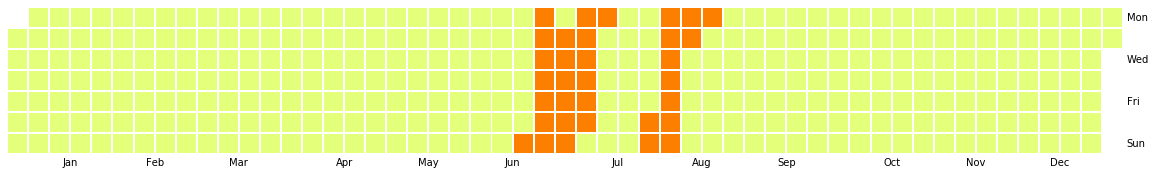

In [481]:
plt.rcParams['figure.figsize'] = [20, 20]
calmap.yearplot(events, year=2019, dayticks=[0, 2, 4, 6], cmap='Wistia_r')

# Performance difference between SPY and BTC

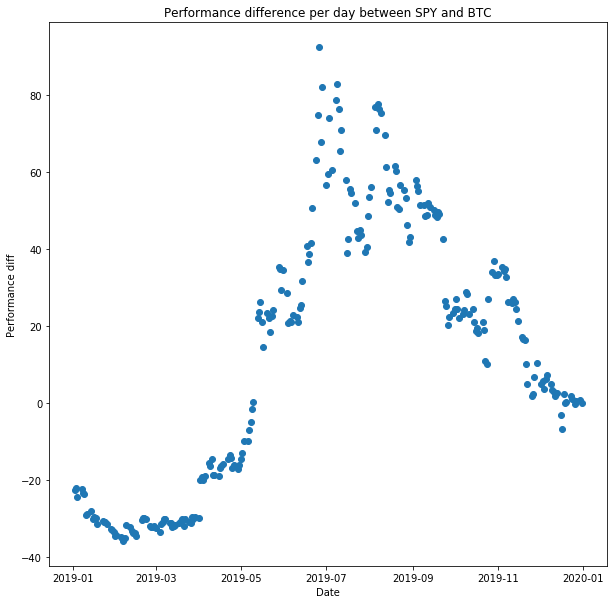

In [486]:
plt.rcParams['figure.figsize'] = [10, 10]
new_x = mdates.datestr2num(list(SPYvsBTC.keys()))
plt.xlabel('Date')
plt.ylabel('Performance diff')
plt.title('Performance difference per day between SPY and BTC')
vals = np.array(list(SPYvsBTC.values())).astype(np.double)

plt.plot_date(x=new_x, y=vals, marker='o')

# Histogram of performance for both assets

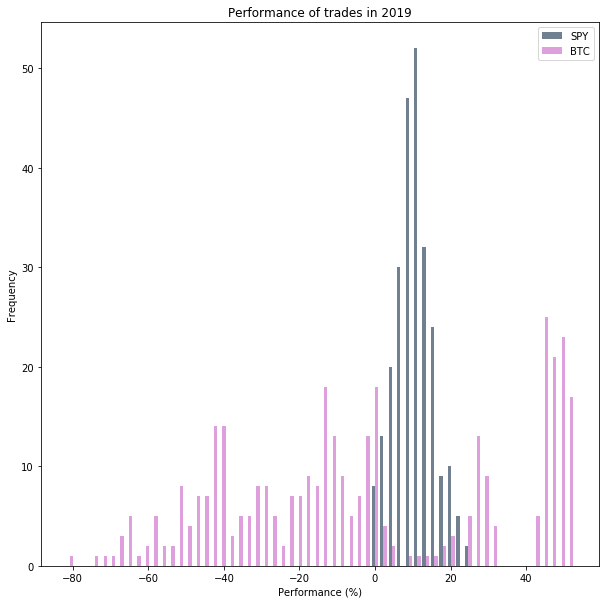

In [484]:
num_bins = 60
colors = ['slategray', 'plum']
n, bins, patches = plt.hist([list(SPYPerf.values()),list(btcPerf.values())], num_bins, histtype='bar', color=colors, label=['SPY', 'BTC'])
plt.legend(prop={'size': 10})
plt.xlabel('Performance (%)')
plt.ylabel('Frequency')
plt.title('Performance of trades in 2019')
plt.show()